# 1D Procedural Terrain Generation

In [1]:
import math
import random
from typing import List

import matplotlib.pyplot as plt

In [2]:
def plot(ys, point=False):
    plt.figure(figsize=(20, 3))
    plt.ylim((0, 100))
    plt.fill_between(range(len(ys)), ys, color='k')
    plt.xticks([])
    plt.yticks([])
    plt.plot(ys, 'k')
    plt.show()

In [3]:
def mapv(v, ol, oh, nl, nh):
    """maps the value `v` from old range [ol, oh] to new range [nl, nh]
    """
    return nl + (v * ((nh - nl) / (oh - ol)))

In [4]:
def linp(a, b, mu):
    """returns the intermediate point between `a` and `b` which is `mu` factor away from `a`.
    """
    return a * (1 - mu) + b * mu

In [5]:
import math

def cosp(a, b, mu):
    """returns the intermediate point between `a` and `b` which is `mu` factor away from `a`.
    """
    mu2 = (1 - math.cos(mu * math.pi)) / 2
    return a * (1 - mu2) + b * mu2

In [6]:
import random

def terrain_naive(width) -> List[float]:
    """returns the list of integers representing height at each point.
    """
    return [
        mapv(random.random(), 0, 1, 0, 100)
        for i in range(width)
    ]

In [7]:
naive_terrain = terrain_naive(2**8)

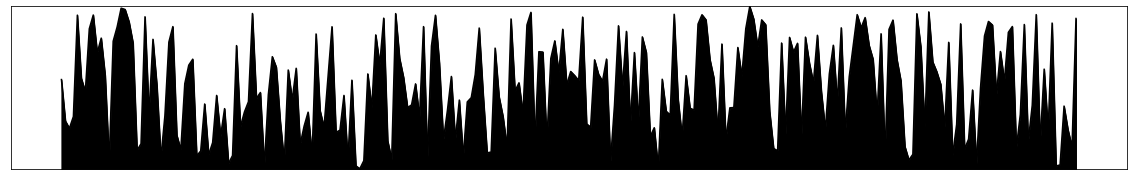

In [8]:
plot(naive_terrain)

In [9]:
def terrain_linp(naive_terrain, sample=4) -> List[float]:
    """Using naive terrain `naive_terrain` the function generates
    Linearly Interpolated terrain on sample data.
    """
    terrain = []

    # get every `sample`th point from the naive terrain.
    sample_points = naive_terrain[::sample]

    # for every point in sample point denoting 
    for i in range(len(sample_points)):

        # add current peak (sample point) to terrain.
        terrain.append(sample_points[i])

        # fill in `sample - 1` number of intermediary points using
        # lineaar interpolation.
        for j in range(sample - 1):
            # compute relative distance from the left point
            mu = (j + 1)/sample
          
            # compute interpolated point at relative distance of mu
            a = sample_points[i]
            b = sample_points[(i + 1) % len(sample_points)]
            v = linp(a, b, mu)

            # add interpolated point to the terrain
            terrain.append(v)

    # return the terrain
    return terrain

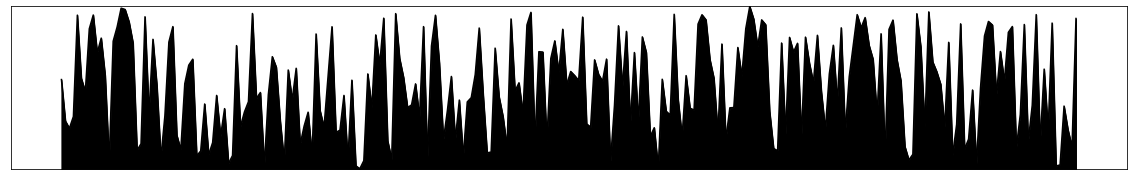

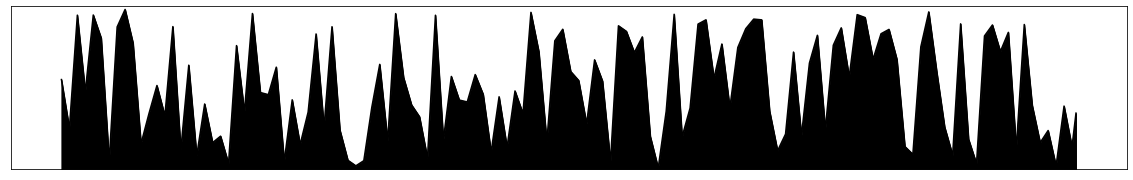

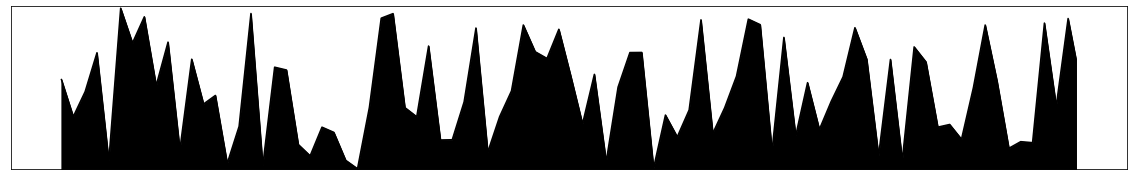

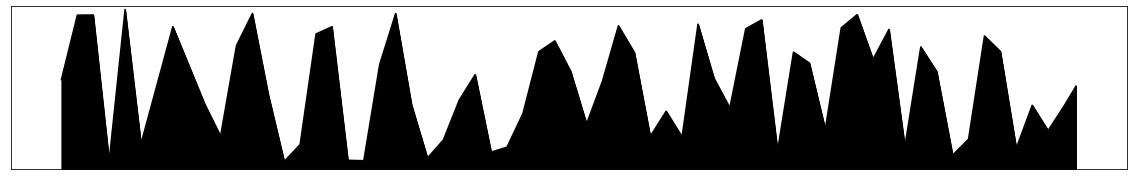

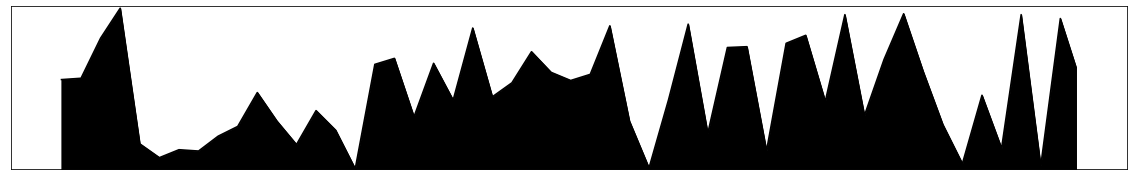

In [10]:
for sample in range(1, 6):
    plot(terrain_linp(naive_terrain, sample=sample))

In [11]:
def terrain_superpos_linp(naive_terrain, iterations=8) -> List[float]:
    """Using naive terrain `naive_terrain` the function generates
    Linearly Interpolated Superpositioned terrain that looks real world like.
    """
    terrains = []

    # holds the sum of weights for normalization
    weight_sum = 0

    # for every iteration
    for z in range(iterations, 0, -1):
        terrain = []

        # compute the scaling factor (weight)
        weight = 1 / (2**(z - 1))

        # compute sampling frequency suggesting every `sample`th
        # point to be picked from the naive terrain.
        sample = 1 << (iterations-z)

        # get the sample points
        sample_points = naive_terrain[::sample]
        
        weight_sum += weight

        for i in range(len(sample_points)):

            # append the current sample point (scaled) to the terrain
            terrain.append(weight * sample_points[i])

            # perform interpoation and add all interpolated values to
            # to the terrain.
            for j in range(sample - 1):
                # compute relative distance from the left point
                mu = (j + 1) / sample

                # compute interpolated point at relative distance of mu
                a = sample_points[i]
                b = sample_points[(i + 1) % len(sample_points)]
                v = linp(a, b, mu)

                # add interpolated point (scaled) to the terrain
                terrain.append(weight * v)

        # append this terrain to list of terrains preparing
        # it to be super positioned.
        terrains.append(terrain)

    # perform super position and normalization of terrains to
    # get the final terrain
    return [sum(x)/weight_sum for x in zip(*terrains)]

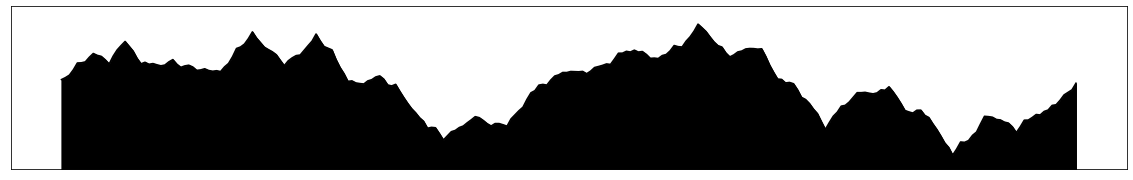

In [12]:
plot(terrain_superpos_linp(naive_terrain, iterations=6))